# Introduction to Artificial Neural Networks with Keras

## Artificial Neuron
- Input: vector $\vec{x}$
- Connection weights $\vec{w}$
    - Weights assigned to each edge between a neuron from previous layer to the current neuron
    - Same dimension as input vector $\vec{x}$
- Output (a number): $h_{\vec{w}} (\vec{x}) = \phi(\vec{x}^T \vec{w})$
    - $\phi$: activation function
- Example: Threshold logic unit (TLU) a.k.a linear threshold unit (LTU)
    - Use some step function as the activation function, can be one of the following:
        - heaviside(z) = 0 if z < 0; 1 if z >= 0
        - sgn(z) = -1 if z < 0; 0 if z = 0; +1 if z > 0
        
        
## Perceptron (single layer) (Rosenblatt 1957)
- Input layer composed of input neurons and a bias neuron (always output 1)
- Output layer composed of output neurons (e.g. TLUs)
    - $\vec{h}_{\boldsymbol{W},\vec{b}} (\boldsymbol{X}) = \phi(\boldsymbol{X} \boldsymbol{W}) + \vec{b}$
        - $\boldsymbol{X}$: the matrix of input features. One row per instance and one column per feature.
        - $\boldsymbol{W}$: the connection weight matrix. One row per input (previous) neuron (feature) and one column per neuron in the current layer.
        - $\vec{b}$: bias vector: weights between the bias neuron and the neuron in the current layer
        - $\phi$: activation function. It is a step function if neurons are TLUs.
        - $\vec{h}$: Number of output neurons determined the output vector dimension
- The output layer is fully connected (dense) because each neuron is connected to every neuron in the previous layer.
- Training: Hebbs Rule (Hebb 1949)
    - Randomly initialize $\boldsymbol{W}$.
    - For each iteration $t>=1$ (input instance), the weight update for each element in $\boldsymbol{W}$ is $w_{i,j}^t = w_{i,j}^{t-1} + \eta(y_j - \hat{y_j})x_i$
        - $w_{i,j}$ is the weight connecting the ith input neuron and the jth output neuron.
        - $x_i$ is the ith input value of the current training instances
        - $\hat{y}_j$ is the output of jth output neuron for the current training instance
        - $y_j$ is the target output of the jth output neuron for the current training instance
        - $\eta$ is the learning rate.
- Limitation of single layer perceptron
    - Can only learn linear pattern (before the transformation of activation function).
    - Cannot solve simple problems like Exclusive OR (XOR) problem.
        - XOR problem: y = 1 if only one of the x1, x2 = 1; i.e. y(0,0)=0, y(1,1)=0, y(0,1)=y(1,0)=1
        - It's not possible to find a set of weights for a single layer perception with TLUs as neurons to get the results above.
        - Stacking one more layer of a single TLU as the final output layer can solve this problem.

In [5]:
# Scikit-Learn's implement of Perceptron

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

# Equivalently, use SGDClassifier with loss="perceptron", learning_rate="constant", eta0=1, and penalty=None

## Multilayer Perceptron (MLP)
- Structure: one input layer, one or more hidden layers, and one output layer.
- Upper layers: layers close to the output layers.
- Lower layers: layers close to the input layers.
- All layers except the output layer includes a bias neuron.
- All layers are fully connected to the next layer.
- Feedforward neural network (FNN): signal flows only in one direction (from the input layer to the output layer).
- Deep neural network (DNN): an ANN with a deep stack of hidden layers.


## Backpropagation
- "Learning Internal Representations by Error Propagation" - Rumelhart, Hinton & Williams 1986
- Reserse-mode autodiff is used to compute gradients.
- Instead of step functions, differentiable activation functions are used
    - logistic (sigmoid) function: $\sigma(z)=1/(1+exp(-z))$
    - hyperbolic tangent function (symmetric around 0, fast to converge): $tanh(z)=2\sigma(2z)-1$
    - retified linear unit function (not differentiable at 0 but fast and good in practice): $ReLU(z) = max(0,z)$
- Without an activation function, the ANN becomes a purely linear function and cannot solve complex problems.
- Backpropagation algorithm
    1. Initialize all the weights randomly. DO NOT initialize the weights using a same value like zero. In that case, each pass will assign same error gradients to all nodes in a layer, leading to the same values after gradient decent like there is only one node per layer.
    2. It handles one mini-batch at a time (an epoch) and eventually goes through the all training set multiple times.
    3. Forward pass: Each mini-batch is fed into the input layer and the final predictions out of the output layer are made, using the weights in the current epoch.
    4. Output errors are computed using a loss function.
    5. Reserve pass: using the chain rule of differentiation, it computes how much of each node contributed to the error for each layer, all the way to the input layer.
    6. The values of the error gradient from last step were used to perform the gradient descent (adjust the weights) for the next epoch.



## Activation Functions
- logistic (sigmoid) function: $\sigma(z)=1/(1+exp(-z))$
- hyperbolic tangent function (symmetric around 0, fast to converge): $tanh(z)=2\sigma(2z)-1$
- retified linear unit function (not differentiable at 0 but fast and good in practice): $ReLU(z) = max(0,z)$
- softplus: a smooth variant of ReLU: $\text{softplus}(z)=log(1+exp(z))$. It is close to 0 when z is negative, close to z when z is positive.
- softmax: used as output activation function to normalize the multi-class classification target: $\text{softmax}(z_j) = \frac{exp(z_j)}{\sum_{i=1}^N{exp(z_i)}}$

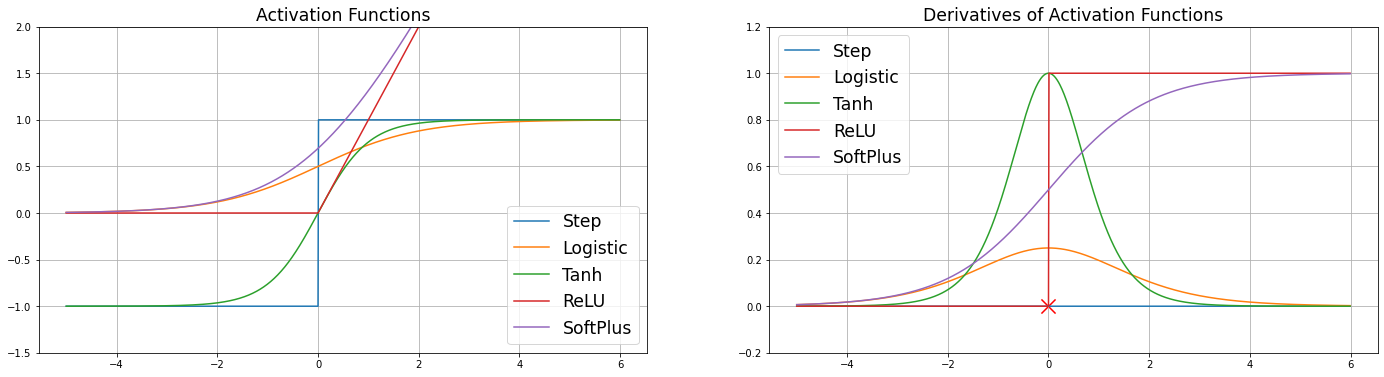

In [21]:
# Activation function visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x_s = np.arange(-5,6,0.01)

y_step = np.where(x_s>=0, 1,-1)
y_logistic = 1/(1+np.exp(-x_s))
y_tanh = 2/(1+np.exp(-2*x_s))-1
y_relu = np.where(x_s>=0,x_s,0)
y_softplus = np.log(1+np.exp(x_s))

dy_step = np.repeat(0,x_s.shape[0])
dy_logistic = np.exp(-x_s)/(1+np.exp(-x_s))**2
dy_tanh = 4*np.exp(-2*x_s)/(1+np.exp(-2*x_s))**2
dy_relu = np.where(x_s>=0,1,0)
dy_softplus = 1/(1+1/np.exp(x_s))

fig = plt.figure(figsize=[24,6])

ax1 = fig.add_subplot(1,2,1)

line11 = ax1.plot(x_s, y_step, label="Step")
line12 = ax1.plot(x_s, y_logistic, label="Logistic")
line13 = ax1.plot(x_s, y_tanh, label="Tanh")
line14 = ax1.plot(x_s, y_relu, label="ReLU")
line15 = ax1.plot(x_s, y_softplus, label="SoftPlus")

ax1.set_ylim(-1.5,2)
ax1.legend(loc="lower right", fontsize="xx-large")
ax1.grid(True)
ax1.set_title("Activation Functions", fontsize="xx-large")

ax2 = fig.add_subplot(1,2,2)

line21 = ax2.plot(x_s, dy_step, label="Step")
line22 = ax2.plot(x_s, dy_logistic, label="Logistic")
line23 = ax2.plot(x_s, dy_tanh, label="Tanh")
line24 = ax2.plot(x_s, dy_relu, label="ReLU")
line25 = ax2.plot(x_s, dy_softplus, label="SoftPlus")
ax2.scatter(0,0,marker='x',s=200, c='red')

ax2.set_ylim(-0.2,1.2)
ax2.legend(loc="upper left", fontsize="xx-large")
ax2.grid(True)
ax2.set_title("Derivatives of Activation Functions", fontsize="xx-large")

plt.show()

## Loss Functions
- Since output $\vec y$ is a vector for each instance, the output of a batch input is a matrix $\boldsymbol Y$, with each row an output from one instance.
- The final value of a loss function must be summarized across both dimensions of the matrix $\boldsymbol Y$.
    - For each element, calculate $loss(y_{i,j} - \hat y_{i,j})$ with the choice of loss function.
    - For each row, calculate average or weighted average of the element-wise loss
        - In TensorFlow, set sample_weight to a matrix with same size as $\boldsymbol Y$
    - Summarize across all rows: avg, sum, weighted-sum
        - In TensorFlow, 
            - set sample_weight to a vector with same size as number of instances in the batch.
            - set `reduction` to `sum_over_batch_size` or `tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE`: average over instances
            - set `reduction` to `sum` or `tf.keras.losses.Reduction.SUM`: sum over instances
            - set `reduction` to `none` or `tf.keras.losses.Reduction.NONE`: do not summarize and output a vector with the same size as number of instances
- Choices of loss functions:
    - Continuous targets ($e_{i,j}=y_{i,j} - \hat y_{i,j}$)
        - Mean Square Error: $e_{i,j}^2$
        - Mean Absolute Error: $\vert e_{i,j} \vert$
        - Huber Loss, less sensitive to outliers: if $\vert e_{i,j} \vert \le \delta$, then $\frac{1}{2}e_{i,j}^2$; otherwise $\delta(\vert e_{i,j} \vert - \frac{1}{2}\delta)$
    - Binary targets ($\hat{p}_{i,j}$ is the estimated probability)
        - Logloss / Cross Entropy: $-[(1-y_{i,j})\log{(1-\hat{p}_{i,j})} + y_{i,j}\log{\hat{p}_{i,j}}]$

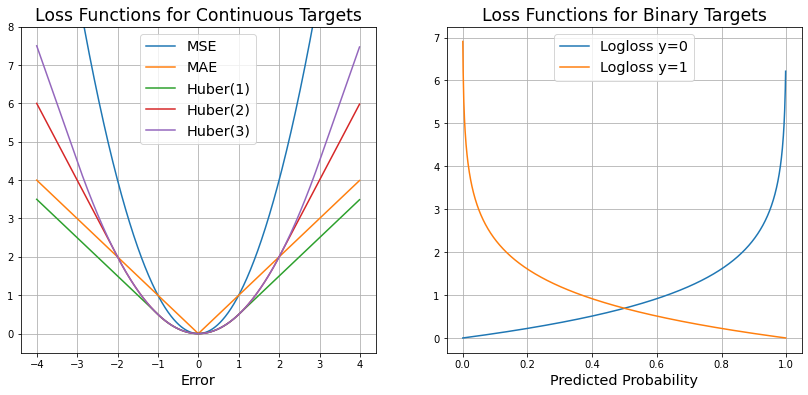

In [1]:
# Activation function visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

e_s = np.arange(-4,4,0.01)
y_mse = e_s**2
y_mae = np.absolute(e_s)

fig = plt.figure(figsize=[14,6])
ax1 = fig.add_subplot(1,2,1)

line1 = ax1.plot(e_s,y_mse,label="MSE")
line2 = ax1.plot(e_s,y_mae,label="MAE")

for i in [1,2,3]:
    ax1.plot(e_s,np.where(np.absolute(e_s)<=i,0.5*e_s**2,i*(np.absolute(e_s)-0.5*i)), label=f"Huber({i})")

ax1.set_ylim(-0.5,8)
ax1.grid(True)
ax1.legend(fontsize="x-large")
ax1.set_title("Loss Functions for Continuous Targets", fontsize="xx-large")
ax1.set_xlabel("Error", fontsize="x-large")
# plt.gca().set_aspect('equal', adjustable='box')

p_s = np.arange(0.001,0.999,0.001)
log_y0 = -np.log(1-p_s)
log_y1 = -np.log(p_s)

ax2 = fig.add_subplot(1,2,2)

line3 = ax2.plot(p_s,log_y0,label="Logloss y=0")
line4 = ax2.plot(p_s,log_y1,label="Logloss y=1")

ax2.grid(True)
ax2.legend(fontsize="x-large",loc="upper center")
ax2.set_title("Loss Functions for Binary Targets", fontsize="xx-large")
ax2.set_xlabel("Predicted Probability", fontsize="x-large")

plt.show()

## Regression MLP
- Output dimension: equal to target dimension
- Output activation function: depends on the range of desired output
    - Any range: no activation
    - Postive output: ReLU, softplus
    - Any given range: logistic or hyperbolic tangent, then scale it to the range.
- Hidden activation function: ReLU or SELU
- Loss function: MSE or MAE/Huber (if outliers)


## Classification MLP
- Output layer:
    - Multi-label binary target: one output neuron for each label
    - Single-lable multi-class target: one output neuron for each class, input into the softmax function
        - Softmax function for a series $z_j$: $softmax(z_j) = \frac{exp(z_j)}{\sum_{i=1}^N{exp(z_i)}}$
    - Multi-label multi-class targets: combining multiple "neurons-softmax" components into the output layer.
- Hidden activation function: ReLU or SELU
- Loss function: logloss / cross-entropy

# Autodiff in TensorFlow

[Autodifferentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) (autodiff) are a group of algorithms that computes the partial derivatives. The purpose of the autodiff is to generate the compuation graph for partial derivatives from the computation graph of the original function. Once the graph is computed, it can be saved and used many times later in backpropagation.

To get a compuation graph, a function $\vec y = f(\vec x)$ can be decomposed into the following elements:
- $\vec x$: independent variable vector with length n
- $\vec y$: dependent variable vector with length m
- $w_i$: the ith element to be combined by operators

For example: $y = x_1 x_2 + \sin x_1$
- $w_1 = x_1$
- $w_2 = x_2$
- $w_3 = w_1 w_2$
- $w_4 = \sin x_1$
- $w_5 = w_3 + w_4$

## Forward-Mode Autodiff (not used in TensorFlow)

Forward-Mode Autodiff algorithm

- For each independent variable $x_i$:
    - For each $w_j$:    
        - Computes $\dot{w_j} = \frac{\partial w_j}{\partial x_i}$ for each $w_j$.         
        - Eventually, the compuation reaches $\frac{\partial y_l}{\partial x_i}$.
        
## Reverse-Mode Autodiff (used in TensorFlow)

Reverse-Mode Autodiff algorithm

- For each dependent variable $y_l$:
    - For each $w_j$:
        - Computes $\bar w_j = \frac{\partial y_l}{\partial w_j}$ for each $w_j$
        - Eventually, the compuation reaches $\frac{\partial y_l}{\partial x_i}$.
        
## Compare Forward-Mode and Reverse-Mode Autodiff

- Forward-Mode
    - Goes through one x for each iteration
    - It is expensive for long $\vec x$.
    - Deep learning usually takes many input features (x), which makes forward-mode a bad choice.
- Reverse-Mode
    - Goes through one y for each iteration.
    - It is expensive for long $\vec y$.
    - Deep learning usually has limited number of y's, making reverse-mode a good choice.

# Get Started with Keras

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

2022-08-29 12:23:06.445168: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


TensorFlow Version: 2.4.0
Keras Version: 2.4.0


## Load fashion MNIST dataset

In [2]:
# Load fashion MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("Methods and attributes of fashion_mnist:\n", dir(fashion_mnist))
# print("Attributes values of fashion_mnist:\n", vars(fashion_mnist))

CLASS_NAMES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Methods and attributes of fashion_mnist:
 ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'load_data']


In [3]:
print("Object Type of X_train_full:", type(X_train_full))
print("Shape of X_train_full:", X_train_full.shape)
print("Datatype of X_train_full:", X_train_full.dtype)
print("Maximum value of X_train_full:", X_train_full.max())
print("Minimum value of X_train_full:", X_train_full.min())
print("Averge value of X_train_full:", X_train_full.mean())
print("Median value of X_train_full:", np.median(X_train_full))

print()
print("Object Type of X_test:", type(X_test))
print("Shape of X_test:", X_test.shape)
print("Datatype of X_test:", X_test.dtype)
print("Maximum value of X_test:", X_test.max())
print("Minimum value of X_test:", X_test.min())
print("Averge value of X_test:", X_test.mean())
print("Median value of X_test:", np.median(X_test))

print()
print("Object Type of y_train_full:", type(y_train_full))
print("Shape of y_train_full:", y_train_full.shape)
print("Datatype of y_train_full:", y_train_full.dtype)
print("Maximum value of y_train_full:", y_train_full.max())
print("Minimum value of y_train_full:", y_train_full.min())
print("Averge value of y_train_full:", y_train_full.mean())
print("Median value of y_train_full:", np.median(y_train_full))
print("Unique values of y_train_full", np.unique(y_train_full))

print()
print("Object Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)
print("Datatype of X_test:", y_test.dtype)
print("Maximum value of y_test:", y_test.max())
print("Minimum value of y_test:", y_test.min())
print("Averge value of y_test:", y_test.mean())
print("Median value of y_test:", np.median(y_test))
print("Unique values of y_test", np.unique(y_test))

Object Type of X_train_full: <class 'numpy.ndarray'>
Shape of X_train_full: (60000, 28, 28)
Datatype of X_train_full: uint8
Maximum value of X_train_full: 255
Minimum value of X_train_full: 0
Averge value of X_train_full: 72.94035223214286
Median value of X_train_full: 0.0

Object Type of X_test: <class 'numpy.ndarray'>
Shape of X_test: (10000, 28, 28)
Datatype of X_test: uint8
Maximum value of X_test: 255
Minimum value of X_test: 0
Averge value of X_test: 73.14656658163265
Median value of X_test: 1.0

Object Type of y_train_full: <class 'numpy.ndarray'>
Shape of y_train_full: (60000,)
Datatype of y_train_full: uint8
Maximum value of y_train_full: 9
Minimum value of y_train_full: 0
Averge value of y_train_full: 4.5
Median value of y_train_full: 4.5
Unique values of y_train_full [0 1 2 3 4 5 6 7 8 9]

Object Type of y_test: <class 'numpy.ndarray'>
Shape of y_test: (10000,)
Datatype of X_test: uint8
Maximum value of y_test: 9
Minimum value of y_test: 0
Averge value of y_test: 4.5
Median 

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Classification MLP

[Built-in Keras Activation Functions](https://keras.io/api/layers/activations/)

Activation functions can be used by keywords "relu" or `activation=keras.activations.relu`

In [14]:
# Classification MLP Example

# model = keras.models.Sequential()
# model.add(keras.Input(shape=(28,28))) # Alternative: keras.layers.InputLayer(input_shape=[28,28])
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# Alternative syntax

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    # keras.layers.InputLayer(input_shape=[28,28]),
    # keras.Input(shape=(28,28)), # Alternative: keras.layers.Flatten(input_shape=[28,28])
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Show the model layers
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
print("Layers of the model:", model.layers)
print("The 1st hidden layer name:", model.layers[1].name)

weights, biases = model.layers[1].get_weights()

print("Weights array of 1st hidden layer:\n", weights)
print("Weigts array shape:", weights.shape)
print("Bias array of 1st hidden layer:\n", biases)
print("Bias array shape:", biases.shape)

Layers of the model: [<tensorflow.python.keras.layers.core.Flatten object at 0x7fed30065580>, <tensorflow.python.keras.layers.core.Dense object at 0x7fed300650a0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fed3006c3d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fed3006c700>]
The 1st hidden layer name: dense_3
Weights array of 1st hidden layer:
 [[ 0.0107454   0.0284195  -0.04515995 ... -0.04617482  0.06409925
  -0.0622897 ]
 [ 0.00311907  0.04058334  0.01102564 ... -0.04226178  0.03335167
   0.02861197]
 [-0.01838876 -0.00636335  0.00059669 ...  0.0097097   0.02998595
  -0.00618225]
 ...
 [ 0.00432442  0.07425138  0.06702617 ... -0.00839204  0.07387292
   0.01194242]
 [ 0.06860408 -0.06803146 -0.05739475 ... -0.02307299 -0.05592947
  -0.06971269]
 [ 0.02780455  0.06321658 -0.0638711  ...  0.03991352 -0.05470443
   0.00236362]]
Weigts array shape: (784, 300)
Bias array of 1st hidden layer:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.